In [1]:
#Import Libraries
import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

In [2]:
def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()
    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)
    
_upload() #upload any text file for which Word-Cloud is to be made. 0ne can also collect Data from other sources as well

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `f,p.TXT` (142.98 kB)


In [3]:
def calculate_frequencies(file_contents):
    comment_words = ' '
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # Remove uninteresting words from text
    d={}
    for line in file_contents.split():
        for v in line.split():
            
            if v.isalpha():
                if v in punctuations:
                    v=" "
                    a="".join(v)
                else:
                    a="".join(v)

            
            if a in uninteresting_words:
                a=""
        d.setdefault(a,len(a))
                       
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(d)
    return cloud.to_array()

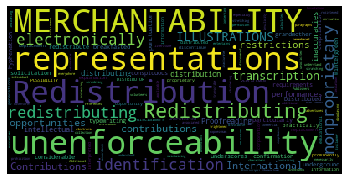

In [4]:
# Generate Word-Cloud
myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()